In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [106]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [107]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [117]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [109]:
df.duplicated().sum()

0

In [110]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [119]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [120]:
x= df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [122]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [123]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [114]:
X_train.shape

(8000, 13)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [126]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [127]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 11)) 
model.add(Dense(11,activation='relu')) 
#input layer node number = 3
model.add(Dense(1,activation='sigmoid'))               
#output layer node number = 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam')

In [130]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6476 - val_loss: 0.4860
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4586 - val_loss: 0.4431
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4244 - val_loss: 0.4255
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4148 - val_loss: 0.4132
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3986 - val_loss: 0.4024
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4039 - val_loss: 0.3934
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3892 - val_loss: 0.3859
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3698 - val_loss: 0.3779
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3801 - val_loss: 0.3733
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3730 - val_loss: 0.3666
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3591 - val_loss: 0.3607
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━

In [131]:
model.layers[0].get_weights()

[array([[ 1.73374817e-01, -3.12242508e-01,  1.88629255e-01,
          1.17497891e-01, -2.49089133e-02,  2.93357104e-01,
          9.98399481e-02, -6.53270334e-02, -1.00275561e-01,
          5.44490330e-02, -1.72769390e-02],
        [ 6.11923814e-01,  9.44242597e-01,  2.71932155e-01,
         -5.29033840e-01, -1.68085799e-01,  2.58556902e-01,
          6.17862403e-01,  1.31547666e+00,  6.34936154e-01,
          3.47663045e-01, -5.56013823e-01],
        [ 3.21841270e-01, -1.75009504e-01, -1.02609634e-01,
         -5.27154505e-01,  2.05975309e-01,  1.36214197e-01,
         -2.64799803e-01,  7.81638324e-02,  4.91826147e-01,
          4.04886864e-02,  1.55115649e-02],
        [-6.93310320e-01, -2.73900926e-01, -2.05797963e-02,
          6.48221016e-01, -1.08612746e-01,  1.07145049e-01,
          1.57270491e-01,  8.50816488e-01,  3.19952548e-01,
          4.48626161e-01,  2.34506875e-01],
        [-1.34197474e-01, -6.49873912e-01,  9.23339307e-01,
         -1.36600837e-01, -3.06953013e-01, -

In [132]:
model.layers[1].get_weights()

[array([[ 1.70249432e-01, -3.64114740e-03, -4.92700577e-01,
         -3.74526158e-02, -1.50211498e-01, -9.11137044e-01,
         -4.54601794e-01,  4.70967174e-01,  4.98895019e-01,
          3.99942622e-02,  5.29990494e-01],
        [ 3.46168488e-01, -2.26529725e-02,  3.28862667e-02,
         -4.20746922e-01, -1.99300259e-01, -2.08368286e-01,
         -3.91634643e-01,  9.43997130e-02,  5.00325799e-01,
         -5.96180782e-02, -2.95372993e-01],
        [-2.33504176e-01,  3.17388654e-01,  5.49564302e-01,
          1.93297520e-01, -1.40186250e+00,  4.99837220e-01,
          4.01569456e-01, -2.65350491e-01, -4.12720084e-01,
          2.06825182e-01,  4.02534530e-02],
        [ 3.83218229e-01, -6.40393674e-01, -6.65241666e-03,
          2.98698753e-01, -5.79584956e-01,  5.78779280e-01,
          2.55597413e-01,  4.30274814e-01,  3.73212367e-01,
         -1.16002485e-01,  5.53545237e-01],
        [ 3.32527339e-01, -2.85758674e-01,  4.46007907e-01,
          2.72270828e-01, -4.75877404e-01,  

In [142]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [143]:
y_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [133]:
y_log= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [144]:
y_pred = y_pred.argmax(axis=-1)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.7925

In [147]:
import matplotlib.pyplot as plt


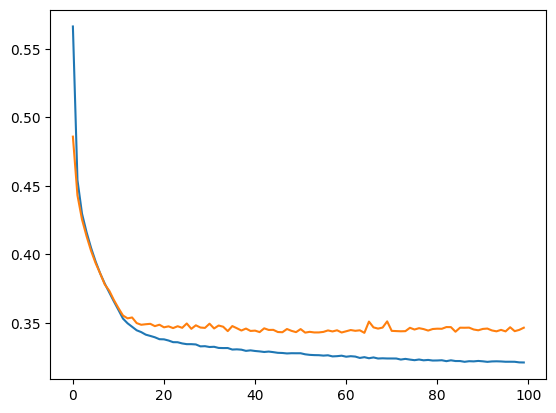

In [138]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
